# Tracking multiple 2d points moving in the plane using the Kalman filter

We use the [ssm-jax](https://github.com/probml/ssm-jax/blob/main/ssm_jax/) library.


In [2]:
# Silence WARNING:root:The use of `check_types` is deprecated and does not have any effect.
# https://github.com/tensorflow/probability/issues/1523

import logging
logger = logging.getLogger()

from matplotlib import pyplot as plt
import seaborn as sns

try:
    from probml_utils import savefig, latexify,is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify,is_latexify_enabled
    
try:
  from ssm_jax.plotting import plot_lgssm_posterior
except ModuleNotFoundError:
  %pip install -qq git+https://github.com/probml/ssm-jax.git
  from ssm_jax.plotting import plot_lgssm_posterior

try:
    from ssm_jax.lgssm.demos.kf_parallel import kf_parallel
except ModuleNotFoundError:
    %pip install -qq ssm_jax
    from ssm_jax.lgssm.demos.kf_parallel import kf_parallel

class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()

logger.addFilter(CheckTypesFilter())

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 125 kB 4.9 MB/s 
     |████████████████████████████████| 88 kB 4.5 MB/s 
     |████████████████████████████████| 272 kB 64.1 MB/s 
     |████████████████████████████████| 72 kB 600 kB/s 
     |████████████████████████████████| 1.1 MB 61.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 140 kB 5.2 MB/s 
     |████████████████████████████████| 1.4 MB 34.5 MB/s 
     |████████████████████████████████| 843 kB 48.7 MB/s 
     |████████████████████████████████| 96 kB 6.3 MB/s 
     |████████████████████████████████| 793 kB 52.2 MB/s 
     |████████████████████████████████| 381 kB 64.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [3]:
latexify(width_scale_factor=2.8, fig_height=1.75)

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [4]:
def plot_kf_parallel(xs, ys, lgssm_posteriors):
    num_samples = len(xs)
    dict_figures = {}

    # Plot Data
    fig,ax = plt.subplots()
    for n in range(num_samples):
        ax.plot(*xs[n,:,:2].T, ls="--", color=f"C{n}",linewidth=0.7 if is_latexify_enabled() else 1.5)
        ax.plot(*ys[n,...].T,'.', color=f"C{n}", label=f"Trajectory {n+1}",markersize=1)
    ax.set_yticks((5,10,15))
    ax.set_xticks((10,15,20,25))
    if is_latexify_enabled():
      pass
    else:
      ax.legend(ncol=2)
    sns.despine()
    dict_figures["missiles_latent"] = fig
    savefig("missiles_latent")

    # Plot Filtering
    fig,ax = plt.subplots()
    for n in range(num_samples):
        ax.plot(*ys[n,...].T,'.',markersize=1)
        filt_means = lgssm_posteriors.filtered_means[n,...]
        filt_covs = lgssm_posteriors.filtered_covariances[n,...]
        plot_lgssm_posterior(filt_means,
                             filt_covs,
                             ax,color=f"C{n}",
                             ellipse_kwargs={'edgecolor':f"C{n}",
                                             'linewidth':0.2 if is_latexify_enabled() else 1.5},
                             label=f"Trajectory {n+1}",linewidth=0.2 if is_latexify_enabled() else 1.5)
    if is_latexify_enabled():
      ax.legend(fontsize=7,loc="lower left",ncol=2,labelspacing=0.1,columnspacing=0.7,handletextpad=0.1)
    else:
      ax.legend(ncol=2)
    ax.set_yticks((5,10,15))
    ax.set_xticks((10,15,20,25))
    sns.despine()
    dict_figures["missiles_filtered"] = fig
    savefig("missiles_filtered")


    # Plot Smoothing
    fig,ax = plt.subplots()
    for n in range(num_samples):
        ax.plot(*ys[n,...].T,'.',markersize=1)
        filt_means = lgssm_posteriors.smoothed_means[n,...]
        filt_covs = lgssm_posteriors.smoothed_covariances[n,...]
        plot_lgssm_posterior(filt_means,
                             filt_covs,
                             ax,color=f"C{n}",
                             ellipse_kwargs={'edgecolor':f"C{n}",
                                             'linewidth':0.2 if is_latexify_enabled() else 1.5},
                             label=f"Trajectory {n+1}",linewidth=0.2 if is_latexify_enabled() else 1.5)
    if is_latexify_enabled():
      ax.legend().remove()
    else:
      ax.legend(ncol=2)
    ax.set_yticks((5,10,15))
    ax.set_xticks((10,15,20,25))
    sns.despine()
    dict_figures["missiles_smoothed"] = fig
    savefig("missiles_smoothed")
    plt.show()

/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")
/usr/local/lib/python3.7/dist-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


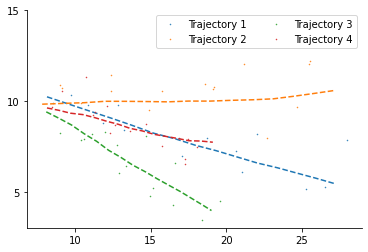

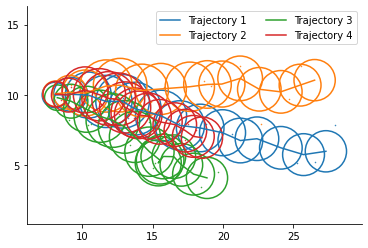

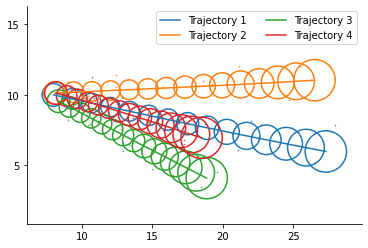

In [5]:
x, y, lgssm_posterior = kf_parallel()
plot_kf_parallel(x, y, lgssm_posterior)